### Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

### Подберите параметры модели SARIMAX для этого ряда.

### Сделайте вывод о том, как изменилась модель по сравнению с недельной.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 

from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

import itertools
import warnings

In [3]:
data = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])

In [4]:
data.columns.drop('Time') 
data_m = data.resample("M").mean()

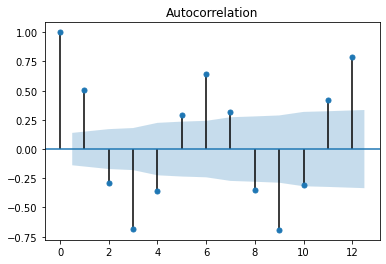

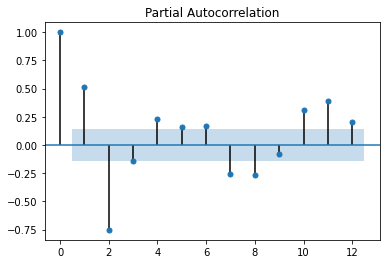

In [5]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=12)
plt.show()
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=12)
plt.show()

In [6]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [7]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-14],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:4368.713353745632
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:3969.593153059822
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:3668.849812029569
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:3111.1623087149655
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:2887.2022822327326
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:2659.1196710294066
ARIMA(0, 0, 0)x(0, 2, 0, 12)3 - AIC:3060.6007044277094
ARIMA(0, 0, 0)x(0, 2, 1, 12)3 - AIC:2874.6141234491224
ARIMA(0, 0, 0)x(0, 2, 2, 12)3 - AIC:2538.4270965295327
ARIMA(0, 0, 0)x(1, 0, 0, 12)3 - AIC:3133.9303182224576
ARIMA(0, 0, 0)x(1, 0, 1, 12)3 - AIC:3113.3768049746923
ARIMA(0, 0, 0)x(1, 0, 2, 12)3 - AIC:2870.4087472650763
ARIMA(0, 0, 0)x(1, 1, 0, 12)3 - AIC:2897.608647255767
ARIMA(0, 0, 0)x(1, 1, 1, 12)3 - AIC:2880.888556496252
ARIMA(0, 0, 0)x(1, 1, 2, 12)3 - AIC:2652.0272650111424
ARIMA(0, 0, 0)x(1, 2, 0, 12)3 - AIC:2792.613790289448
ARIMA(0, 0, 0)x(1, 2, 1, 12)3 - AIC:2762.638561353111
ARIMA(0, 0, 0)x(1, 2, 2, 12)3 - AIC:2529.30729000855
ARIMA(0, 0, 0)x(2, 

ARIMA(0, 1, 2)x(1, 2, 1, 12)3 - AIC:2647.8118817692966
ARIMA(0, 1, 2)x(1, 2, 2, 12)3 - AIC:2405.7610690931433
ARIMA(0, 1, 2)x(2, 0, 0, 12)3 - AIC:2866.108029816335
ARIMA(0, 1, 2)x(2, 0, 1, 12)3 - AIC:2844.6198911834713
ARIMA(0, 1, 2)x(2, 0, 2, 12)3 - AIC:2793.1903454187677
ARIMA(0, 1, 2)x(2, 1, 0, 12)3 - AIC:2647.559092906739
ARIMA(0, 1, 2)x(2, 1, 1, 12)3 - AIC:2635.3315043753537
ARIMA(0, 1, 2)x(2, 1, 2, 12)3 - AIC:2573.6747664085997
ARIMA(0, 1, 2)x(2, 2, 0, 12)3 - AIC:2513.4855323987367
ARIMA(0, 1, 2)x(2, 2, 1, 12)3 - AIC:2471.038635434462
ARIMA(0, 1, 2)x(2, 2, 2, 12)3 - AIC:2407.318672315835
ARIMA(0, 2, 0)x(0, 0, 0, 12)3 - AIC:3562.69847994865
ARIMA(0, 2, 0)x(0, 0, 1, 12)3 - AIC:3296.0864207995137
ARIMA(0, 2, 0)x(0, 0, 2, 12)3 - AIC:3055.45686819452
ARIMA(0, 2, 0)x(0, 1, 0, 12)3 - AIC:3291.1379726072537
ARIMA(0, 2, 0)x(0, 1, 1, 12)3 - AIC:3016.0527022560377
ARIMA(0, 2, 0)x(0, 1, 2, 12)3 - AIC:2789.1261035082766
ARIMA(0, 2, 0)x(0, 2, 0, 12)3 - AIC:3234.1258280740512
ARIMA(0, 2, 0)x(0,

ARIMA(1, 0, 2)x(0, 1, 2, 12)3 - AIC:2604.848107636686
ARIMA(1, 0, 2)x(0, 2, 0, 12)3 - AIC:3012.803949161026
ARIMA(1, 0, 2)x(0, 2, 1, 12)3 - AIC:2713.1665368911254
ARIMA(1, 0, 2)x(0, 2, 2, 12)3 - AIC:2480.6056195904785
ARIMA(1, 0, 2)x(1, 0, 0, 12)3 - AIC:3097.1515069875195
ARIMA(1, 0, 2)x(1, 0, 1, 12)3 - AIC:3141.315408595043
ARIMA(1, 0, 2)x(1, 0, 2, 12)3 - AIC:2916.3985424935754
ARIMA(1, 0, 2)x(1, 1, 0, 12)3 - AIC:2861.1840252330667
ARIMA(1, 0, 2)x(1, 1, 1, 12)3 - AIC:2821.2680053103477
ARIMA(1, 0, 2)x(1, 1, 2, 12)3 - AIC:2591.0735383052715
ARIMA(1, 0, 2)x(1, 2, 0, 12)3 - AIC:2759.8582442247452
ARIMA(1, 0, 2)x(1, 2, 1, 12)3 - AIC:2704.84200083097
ARIMA(1, 0, 2)x(1, 2, 2, 12)3 - AIC:2481.9040702892407
ARIMA(1, 0, 2)x(2, 0, 0, 12)3 - AIC:2863.153135462946
ARIMA(1, 0, 2)x(2, 0, 1, 12)3 - AIC:2956.7867697735705
ARIMA(1, 0, 2)x(2, 0, 2, 12)3 - AIC:2921.18787533829
ARIMA(1, 0, 2)x(2, 1, 0, 12)3 - AIC:2630.7401006131017
ARIMA(1, 0, 2)x(2, 1, 1, 12)3 - AIC:2629.841680938267
ARIMA(1, 0, 2)x(2, 

ARIMA(1, 2, 1)x(2, 1, 0, 12)3 - AIC:2652.0646736452977
ARIMA(1, 2, 1)x(2, 1, 1, 12)3 - AIC:2636.690218761584
ARIMA(1, 2, 1)x(2, 1, 2, 12)3 - AIC:2642.7302591258326
ARIMA(1, 2, 1)x(2, 2, 0, 12)3 - AIC:2510.1424984896457
ARIMA(1, 2, 1)x(2, 2, 1, 12)3 - AIC:2470.9205599462402
ARIMA(1, 2, 1)x(2, 2, 2, 12)3 - AIC:2458.663927587966
ARIMA(1, 2, 2)x(0, 0, 0, 12)3 - AIC:3483.2117365656914
ARIMA(1, 2, 2)x(0, 0, 1, 12)3 - AIC:3166.7078136014225
ARIMA(1, 2, 2)x(0, 0, 2, 12)3 - AIC:2927.845685994519
ARIMA(1, 2, 2)x(0, 1, 0, 12)3 - AIC:3106.6464212481246
ARIMA(1, 2, 2)x(0, 1, 1, 12)3 - AIC:2822.453636247461
ARIMA(1, 2, 2)x(0, 1, 2, 12)3 - AIC:2609.941921160739
ARIMA(1, 2, 2)x(0, 2, 0, 12)3 - AIC:3041.217167351492
ARIMA(1, 2, 2)x(0, 2, 1, 12)3 - AIC:2740.2104630995523
ARIMA(1, 2, 2)x(0, 2, 2, 12)3 - AIC:2502.3992131632513
ARIMA(1, 2, 2)x(1, 0, 0, 12)3 - AIC:3120.851621076191
ARIMA(1, 2, 2)x(1, 0, 1, 12)3 - AIC:3076.1640304463626
ARIMA(1, 2, 2)x(1, 0, 2, 12)3 - AIC:2851.970834060642
ARIMA(1, 2, 2)x(1,

ARIMA(2, 1, 1)x(1, 0, 1, 12)3 - AIC:3023.5670652135414
ARIMA(2, 1, 1)x(1, 0, 2, 12)3 - AIC:2809.431386793373
ARIMA(2, 1, 1)x(1, 1, 0, 12)3 - AIC:2846.655000563547
ARIMA(2, 1, 1)x(1, 1, 1, 12)3 - AIC:2824.1981505619874
ARIMA(2, 1, 1)x(1, 1, 2, 12)3 - AIC:2611.05517453019
ARIMA(2, 1, 1)x(1, 2, 0, 12)3 - AIC:2737.0342848836713
ARIMA(2, 1, 1)x(1, 2, 1, 12)3 - AIC:2661.6339342868896
ARIMA(2, 1, 1)x(1, 2, 2, 12)3 - AIC:2496.5315519747146
ARIMA(2, 1, 1)x(2, 0, 0, 12)3 - AIC:2847.2090296626466
ARIMA(2, 1, 1)x(2, 0, 1, 12)3 - AIC:2809.365381633277
ARIMA(2, 1, 1)x(2, 0, 2, 12)3 - AIC:2810.9183428408032
ARIMA(2, 1, 1)x(2, 1, 0, 12)3 - AIC:2613.835628783593
ARIMA(2, 1, 1)x(2, 1, 1, 12)3 - AIC:2612.7724111709585
ARIMA(2, 1, 1)x(2, 1, 2, 12)3 - AIC:2612.600730688301
ARIMA(2, 1, 1)x(2, 2, 0, 12)3 - AIC:2476.8768528652336
ARIMA(2, 1, 1)x(2, 2, 1, 12)3 - AIC:2433.4241838463063
ARIMA(2, 1, 1)x(2, 2, 2, 12)3 - AIC:2439.5186126307044
ARIMA(2, 1, 2)x(0, 0, 0, 12)3 - AIC:3292.5092382236453
ARIMA(2, 1, 2)x(0

#### Лучшие значения ARIMA(1, 1, 2)x(2, 2, 2, 12)3 - AIC:2405.1162177304104

In [8]:
warnings.filterwarnings("ignore")

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-3],order=[1,1,2],
                                seasonal_order=[2,2,2,12] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 2657.3457334419045


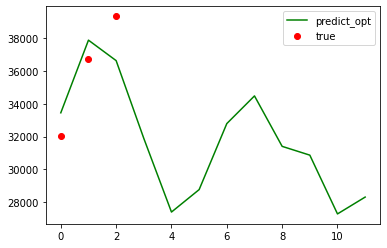

In [9]:
pred_dynamic_opt = results_opt.forecast(12)

plt.plot(pred_dynamic_opt,'g', label='predict_opt' )

plt.plot(data_m['PJME_MW'].values[-3:],'or',label='true')
plt.legend()

plt.show()

#### Поведение модели c месячным ресемплингом по сравнению с недельным существенно не изменилось

### Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)

In [10]:
brent_data = pd.read_csv('my_BRENT2019.csv', sep = ',', index_col=[0], parse_dates=[0])

In [11]:
brent_data_w = brent_data.resample('W').mean()

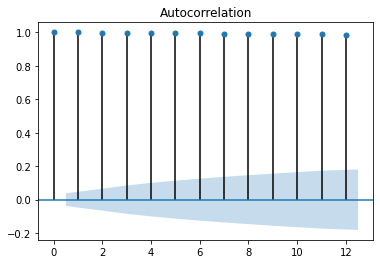

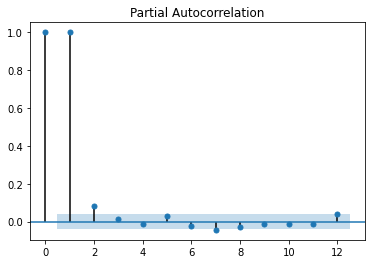

In [12]:
sm.graphics.tsa.plot_acf(brent_data['Значение'].values, lags=12)
plt.show()
sm.graphics.tsa.plot_pacf(brent_data['Значение'].values, lags=12)
plt.show()

In [13]:
p = [0,1] 
q = range(3, 7)
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0]

warnings.filterwarnings("ignore")

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_b = sm.tsa.statespace.SARIMAX(np.log(brent_data['Значение'].values[:-12]),
                                          order=param,seasonal_order=[0,0,0,0],trend='ct',
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results_ = mod_b.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

ARIMA(0, 0, 3)x[0, 0, 0, 0] - AIC:-1769.1655974950977
ARIMA(0, 0, 4)x[0, 0, 0, 0] - AIC:-1905.4059683192804
ARIMA(0, 0, 5)x[0, 0, 0, 0] - AIC:-2024.734090040676
ARIMA(0, 0, 6)x[0, 0, 0, 0] - AIC:-5921.769619780331
ARIMA(0, 1, 3)x[0, 0, 0, 0] - AIC:-14044.51870416538
ARIMA(0, 1, 4)x[0, 0, 0, 0] - AIC:-14038.13284974858
ARIMA(0, 1, 5)x[0, 0, 0, 0] - AIC:-14030.31837909057
ARIMA(0, 1, 6)x[0, 0, 0, 0] - AIC:-14026.316175934666
ARIMA(0, 2, 3)x[0, 0, 0, 0] - AIC:-13922.047801503264
ARIMA(0, 2, 4)x[0, 0, 0, 0] - AIC:-13947.025660004398
ARIMA(0, 2, 5)x[0, 0, 0, 0] - AIC:-13966.47079002409
ARIMA(0, 2, 6)x[0, 0, 0, 0] - AIC:-13967.679011463973
ARIMA(1, 0, 3)x[0, 0, 0, 0] - AIC:-14052.985158830852
ARIMA(1, 0, 4)x[0, 0, 0, 0] - AIC:-14046.436863211942
ARIMA(1, 0, 5)x[0, 0, 0, 0] - AIC:-14038.611904582864
ARIMA(1, 0, 6)x[0, 0, 0, 0] - AIC:-14034.614252623971
ARIMA(1, 1, 3)x[0, 0, 0, 0] - AIC:-14042.42511172559
ARIMA(1, 1, 4)x[0, 0, 0, 0] - AIC:-14034.888113394627
ARIMA(1, 1, 5)x[0, 0, 0, 0] - AIC:-

#### Определяем параметры как ARIMA(1, 0, 3)x[0, 0, 0, 0] - AIC:-14052.985158830848

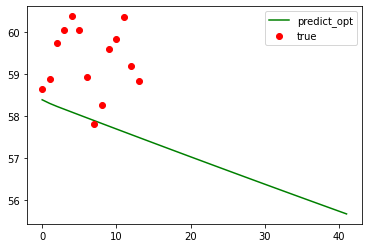

In [14]:
modb_opt = sm.tsa.statespace.SARIMAX(brent_data['Значение'].values[:-14],
                               order=[1,0,3],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb_opt = modb_opt.fit()
pred_dynamic_opt = resultsb_opt.forecast(42) 

plt.plot(pred_dynamic_opt,'g', label='predict_opt' )

plt.plot(brent_data['Значение'].values[-14:],'or',label='true')
plt.legend()
plt.plot()
plt.show()

#### В моем случае модели ARIMA сработали плохо.